Imports

In [182]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, TimeSeriesSplit
from scipy import sparse

from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax import optimize
from ax.utils.notebook.plotting import render, init_notebook_plotting

from warnings import filterwarnings
filterwarnings('ignore')

rng = 0

Segregation of data and viewing some information about these datas.

San Juan
features:  (936, 21)
labels  :  (936, 1)
test:  (260, 21)

Iquitos
features:  (520, 21)
labels  :  (520, 1)
test:  (156, 21)

 San Juan Unique index values
Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008],
           dtype='int64', name='year')

 Iquitos Unique index values
Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype='int64', name='year')

 San Juan Unique index values
       total_cases
count   936.000000
mean     34.180556
std      51.381372
min       0.000000
25%       9.000000
50%      19.000000
75%      37.000000
max     461.000000

 Iquitos unique index values
       total_cases
count   520.000000
mean      7.565385
std      10.765478
min       0.000000
25%       1.000000
50%       5.000000
75%       9.000000
max     116.000000


Text(0.5, 0, 'Time')

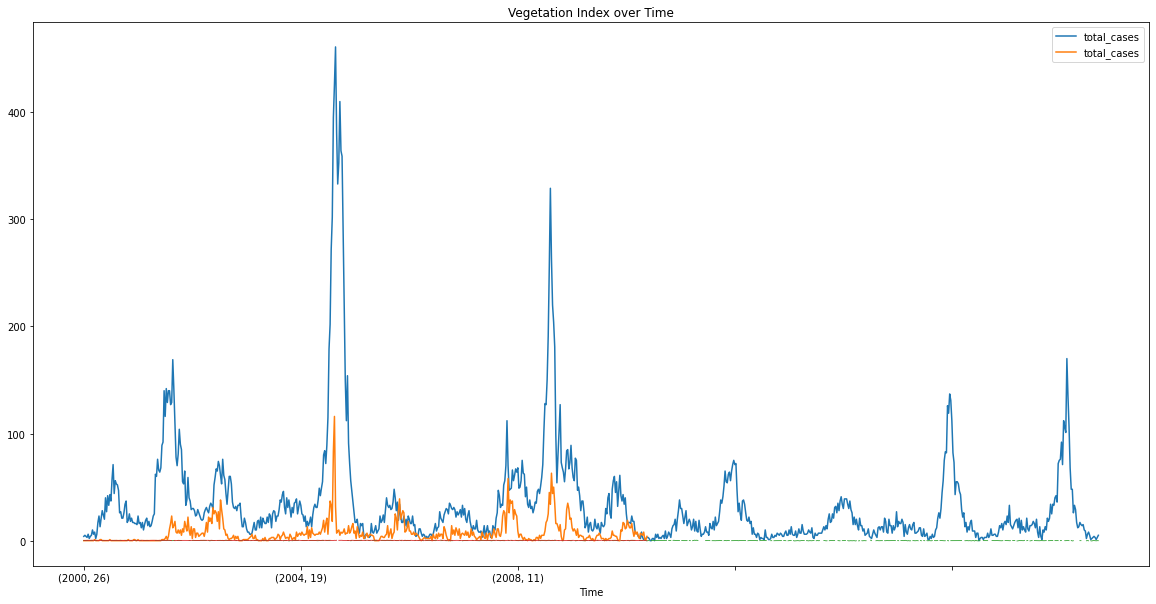

In [183]:
# load the provided data
train_features = pd.read_csv('./data-processed/dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('./data-processed/dengue_labels_train.csv',
                           index_col=[0,1,2])

test_features= pd.read_csv('./data-processed/dengue_features_test.csv',index_col=[0,1,2])

# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']
sj_test_features = test_features.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']
iq_test_features = test_features.loc['iq']

print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)
print('test: ', sj_test_features.shape)
print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)
print('test: ', iq_test_features.shape)

sj_years = sj_train_features.index.get_level_values(0)
print('\n San Juan Unique index values')
print(sj_years.unique())
iq_years = iq_train_features.index.get_level_values(0)
print('\n Iquitos Unique index values')
print(iq_years.unique())

fig, ax = plt.subplots(figsize=(20,10))

sj_train_labels.plot(ax=ax)
print('\n San Juan Unique index values')
print(sj_train_labels.describe())


iq_train_labels.plot(ax=ax)
print('\n Iquitos unique index values')
print(iq_train_labels.describe())



(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))
(iq_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))
plt.title('Vegetation Index over Time')
plt.xlabel('Time')

Remove `week_start_date` string.


In [184]:
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

sj_test_features.drop('week_start_date', axis=1, inplace=True)
iq_test_features.drop('week_start_date', axis=1, inplace=True)

Checking for nulls and Nans.

In [185]:
print('\n San Juan any nulls?')
print(pd.isnull(sj_train_features).any())
print(pd.isna(sj_train_features).any())
print(pd.isnull(sj_train_labels).any())
print('\n Iquitos any nulls?')
print(pd.isnull(sj_train_features).any())
pd.isna(sj_test_features).any()



 San Juan any nulls?
ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool
ndvi_ne                                  True


ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

<b>Preprocessing:</b>

meanRegressor is an EnsembleClass to get the mean prediction.  
Kmeans is used for train data set clustering. 
Gradient Boosting Regressor is used for......

In [186]:
from sklearn.base import BaseEstimator, ClassifierMixin
import copy

class MeanRegressor(BaseEstimator,ClassifierMixin):
    def __init__(self, 
                 kMeans_n_clusters,
                 kMeans_n_init,
                 kMeans_max_iter,
                 gbr_learning_rate,
                 gbr_n_estimators):
        self.kMeans_n_clusters = kMeans_n_clusters
        self.kMeans = KMeans(random_state=rng,
                             n_clusters=kMeans_n_clusters,
                             n_init=kMeans_n_init,
                             max_iter=kMeans_max_iter)
        self.gbr_learning_rate = gbr_learning_rate
        self.gbr_n_estimators = gbr_n_estimators
        return
        
    def fit(self, X, Y):
        self.regressors = []
        self.kMeans.fit(X)
        clusters = self.kMeans.labels_
        X = np.c_[X,clusters]
        Y["cluster"]= clusters
        for clusterNo in range(self.kMeans_n_clusters):
                cluster_x = X[np.where(X[:,-1] == clusterNo)]
                cluster_y = Y[Y.cluster == clusterNo]
                cluster_y.drop("cluster",axis="columns",inplace=True)
                cluster_x = cluster_x[:,:-1]
                gradientBoostingRegressor = \
                    GradientBoostingRegressor(random_state=rng,
                                              max_features = 'auto',
                                              learning_rate=self.gbr_learning_rate,
                                              n_estimators=self.gbr_n_estimators,
                                             )
                gradientBoostingRegressor.fit(cluster_x,cluster_y)
                self.regressors.append(copy.deepcopy(gradientBoostingRegressor))
        return self
    
    def predict(self, X, **fit_params):
        all_test_predictions = np.zeros(X.shape[0])
        for regressor in self.regressors:
            test_prediction = regressor.predict(X)
            all_test_predictions = np.add(all_test_predictions,test_prediction)
        average_test_prediction = all_test_predictions/self.kMeans_n_clusters
        return average_test_prediction

<b>Hyperparameters tuning for sj</b>

The parameterScope is derived from trail and error, by looking at mae and tweaking the bounds and values accordingly. But the problem is that this is just obtaining a local minimums and there maybe be more lower minima(s) out there. I suppose in general the suppose lower minima(s) may have small intercept or even mutually exclusive set of hyperparameters to tune. I was suggested to go with a simipler set of hyper parameters to tune because of Occam's razor.

In [187]:
#gbr = gradientBoostingRegression 
parameterScope=[
        {"name":"knnImputer_n_clusters" ,"type": "range", "bounds": [15,20]},

        {"name":"pca_n_components" ,"type": "range", "bounds": [4,10]},
        
        {"name":"kMeans_n_clusters","type":"range","bounds":[2,5]},
        {"name":"kMeans_n_init" ,"type": "range", "bounds": [60,90]},
        {"name":"kMeans_max_iter" ,"type": "range", "bounds": [200,250]},
        
        {"name":"gbr_learning_rate" ,"type": "choice","value_type":"float", 
         "values": [0.07,0.06,0.05]},
        {"name":"gbr_n_estimators" ,"type": "range", "bounds": [150,200]},
]

I used KNNImputer to impute missing values of train and test features. I chose KNNImputer as there are more contextural imputation that simple imputer with using simple metric like median.

Standard scaler is used for removing mean and scaling to unit variance. Just like standard normal distribution.

PCA is used for dimensionality reduction so that there will be as much varianceas possible in the data that can be explained.


gbr builts estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a useful ensemble.


In [188]:
from sklearn.metrics import accuracy_score
def train(estimator,x_train,y_train):
    estimator.fit(x_train,y_train)
    return estimator

def evaluate(predictions,y_test):
    return mean_absolute_error(y_test,predictions)

def train_evaluate(parameters):
    predictions = train_predict_before_evalutate(parameters)
    return evaluate(predictions,y_test) 

def train_predict_before_evalutate(parameters):
     preprocessing = Pipeline(steps=[
       ("knnImputer", KNNImputer(n_neighbors=parameters["knnImputer_n_clusters"], 
                                 weights="uniform",  
                                 copy=False)),
     ])

     estimator = Pipeline(steps=[
            ('proc', preprocessing),   
            ("standardScaler",StandardScaler()),
            ("pca",PCA(random_state=rng,
                      n_components = parameters["pca_n_components"])),
            ("meanRegressor",MeanRegressor(kMeans_n_clusters=parameters["kMeans_n_clusters"],
                                           kMeans_n_init=parameters["kMeans_n_init"],
                                           kMeans_max_iter =parameters["kMeans_max_iter"],
                                           gbr_learning_rate=parameters["gbr_learning_rate"], 
                                           gbr_n_estimators=parameters["gbr_n_estimators"]
                                          )
            )
     ]) 
     train(estimator,x_train,y_train)
     return estimator.predict(x_test)

train_predict is only used for predicting data from the test csv


In [189]:
def train_predict(parameters, x_train,y_train,x_test):
     preprocessing = Pipeline(steps=[
       ("knnImputer", KNNImputer(n_neighbors=parameters["knnImputer_n_clusters"], 
                                 weights="uniform",  
                                 copy=False)),
     ])

     estimator = Pipeline(steps=[
            ('proc', preprocessing),   
            ("standardScaler",StandardScaler()),
            ("pca",PCA(random_state=rng,
                      n_components = parameters["pca_n_components"])),
            ("meanRegressor",MeanRegressor(kMeans_n_clusters=parameters["kMeans_n_clusters"],
                                           kMeans_n_init=parameters["kMeans_n_init"],
                                           kMeans_max_iter =parameters["kMeans_max_iter"],
                                           gbr_learning_rate=parameters["gbr_learning_rate"], 
                                           gbr_n_estimators=parameters["gbr_n_estimators"]
                                          )
            )
     ]) 
     train(estimator,x_train,y_train)
     return estimator.predict(x_test)

In [190]:
timeSeriesSplit = TimeSeriesSplit()
fold_indices = []

for rest, pick in timeSeriesSplit.split(sj_train_features):
    fold_indices.append(pick)
trainIndices = fold_indices[0]
np.append(trainIndices, fold_indices[1])
np.append(trainIndices, fold_indices[2])
testIndices = fold_indices[3]
np.append(testIndices,fold_indices[4])

x_train = sj_train_features.iloc[trainIndices,:]
y_train = sj_train_labels.iloc[trainIndices,:]
x_test = sj_train_features.iloc[testIndices,:]
y_test = sj_train_labels.iloc[testIndices,:]

best_parameters, values, experiment, model = optimize(
    parameters=parameterScope,
    evaluation_function=train_evaluate,
    objective_name='accuracy',
    total_trials=16,
    minimize=True
)

[INFO 12-03 19:55:37] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter knnImputer_n_clusters. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-03 19:55:37] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter pca_n_components. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-03 19:55:37] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter kMeans_n_clusters. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-03 19:55:37] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter kMeans_n_init. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float

[WARNING 12-03 19:55:39] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[INFO 12-03 19:55:39] ax.service.managed_loop: Running optimization trial 6...
[WARNING 12-03 19:55:39] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 12-03 19:55:39] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 12-03 19:55:39] ax.core.parameter: `

[WARNING 12-03 19:55:42] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 12-03 19:55:42] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[INFO 12-03 19:55:42] ax.service.managed_loop: Running optimization trial 13...
[WARNING 12-03 19:55:42] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 12-03 19:55:42] ax.core.parameter: 

In [191]:
print("Best Parameters: {}".format(best_parameters))
print("\nMean Absolute Value: {}".format(train_evaluate(best_parameters)))

Best Parameters: {'knnImputer_n_clusters': 17, 'pca_n_components': 4, 'kMeans_n_clusters': 2, 'kMeans_n_init': 75, 'kMeans_max_iter': 230, 'gbr_n_estimators': 168, 'gbr_learning_rate': 0.06}

Mean Absolute Value: 32.38818198504621


<b>Train and predict sj data</b>

Proper formatting for resulting csv file

In [192]:
sj_results = train_predict(best_parameters,sj_train_features,sj_train_labels,sj_test_features)
sj_results = pd.DataFrame(data=sj_results,columns=["total_cases"],index= sj_test_features.index)
sj_results["city"] = "sj"
sj_results.reset_index(inplace=True)
sj_results.set_index(["city","year","weekofyear"],inplace=True)

<b>Hyperparameter tuning for iq dataset</b>

Unlike sj, the mae from this scope gives a single digit. I am happy about this so there is no rebounding and values switching in my parameterScope.

In [193]:
#gbr = gradientBoostingRegression 
parameterScope=[
        {"name":"knnImputer_n_clusters" ,"type": "range", "bounds": [2,10]},

        {"name":"pca_n_components" ,"type": "range", "bounds": [4,10]},
        
        {"name":"kMeans_n_clusters","type":"range","bounds":[2,10]},
        {"name":"kMeans_n_init" ,"type": "range", "bounds": [5,100]},
        {"name":"kMeans_max_iter" ,"type": "range", "bounds": [200,250]},
        
        {"name":"gbr_learning_rate" ,"type": "choice","value_type":"float", 
         "values": [0.01,0.1,1]},
        {"name":"gbr_n_estimators" ,"type": "range", "bounds": [100,200]},
]

In [194]:
timeSeriesSplit = TimeSeriesSplit()
fold_indices = []

for rest, pick in timeSeriesSplit.split(iq_train_features):
    fold_indices.append(pick)
trainIndices = fold_indices[0]
np.append(trainIndices, fold_indices[1])
np.append(trainIndices, fold_indices[2])
testIndices = fold_indices[3]
np.append(testIndices,fold_indices[4])

x_train = iq_train_features.iloc[trainIndices,:]
y_train = iq_train_labels.iloc[trainIndices,:]
x_test = iq_train_features.iloc[testIndices,:]
y_test = iq_train_labels.iloc[testIndices,:]

best_parameters, values, experiment, model = optimize(
   parameters=parameterScope,
    evaluation_function=train_evaluate,
    objective_name='accuracy',
    total_trials=10,
    minimize=True
)


[INFO 12-03 19:55:55] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter knnImputer_n_clusters. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-03 19:55:55] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter pca_n_components. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-03 19:55:55] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter kMeans_n_clusters. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-03 19:55:55] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter kMeans_n_init. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float

[WARNING 12-03 19:55:56] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[INFO 12-03 19:55:57] ax.service.managed_loop: Running optimization trial 6...
[WARNING 12-03 19:55:57] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 12-03 19:55:57] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 12-03 19:55:57] ax.core.parameter: `

In [195]:
print("Best Parameters: {}".format(best_parameters))
print("\nMean Absolute Value: {}".format(train_evaluate(best_parameters)))

Best Parameters: {'knnImputer_n_clusters': 5, 'pca_n_components': 4, 'kMeans_n_clusters': 2, 'kMeans_n_init': 21, 'kMeans_max_iter': 234, 'gbr_n_estimators': 126, 'gbr_learning_rate': 0.01}

Mean Absolute Value: 8.855224274075985


<b>Train and predict iq data</b>

Proper formatting for resulting csv file


In [196]:
iq_results = train_predict(best_parameters,iq_train_features,iq_train_labels,iq_test_features)
iq_results = pd.DataFrame(data=iq_results,columns=["total_cases"],index= iq_test_features.index)
iq_results["city"] = "iq"
iq_results.reset_index(inplace=True)
iq_results.set_index(["city","year","weekofyear"],inplace=True)

In [210]:
results = pd.concat([sj_results,iq_results])

results = results.apply(np.ceil)
results = results.astype(dtype='int64')
print(results)
results.to_csv("results.csv")

                      total_cases
city year weekofyear             
sj   2008 18                    6
          19                   24
          20                   18
          21                   19
          22                   28
...                           ...
iq   2013 22                    7
          23                    6
          24                    6
          25                    5
          26                    6

[416 rows x 1 columns]
